<img src="https://www.dropbox.com/s/dor956468xbjtcm/Machine-Learning-made-easy-netflix-header-2.png?dl=1" width="1000"> <br> <br> 

This is a demonstration of how you can use Azure Databricks to build a recommendation algorithm from your Snowflake database tables. We use the publicly available Netflix movies data, a record of 100 million movie ratings by Netflix users. This is publicly available data from the machine learning competition website [Kaggle](https://www.kaggle.com/netflix-inc/netflix-prize-data). 

I will show you how with Azure Databricks you can:
- Explore data
- Visualise data
- Build a recommendation engine 
- Pull data from and create tables in your Snowflake database

<img src="https://www.dropbox.com/s/g44q3d2225fg29q/Databricks_Snowflake_Workflow.png?dl=1" width="1000"> <br> <br>

#### Extract the data from the Snowflake database using the spark-snowflake connector package.

In [4]:
sfOptions = {
  "sfURL" : "yourSFURL",
  "sfAccount" : "yourSFAccount",
  "sfUser" : "yourSFUser",
  "sfPassword" : "yourSFPwd",
  "sfDatabase" : "yourDB",
  "sfSchema" : "yourSchema",
  "sfWarehouse" : "yourWH"
}
SNOWFLAKE_SOURCE_NAME = "net.snowflake.spark.snowflake"

#load full netflix ratings dataset
df = spark.read.format(SNOWFLAKE_SOURCE_NAME) \
  .options(**sfOptions) \
  .option("query",  "select * from netflix_ratings_wide") \
  .load()

#load movie title lookup table
movie_titles = spark.read.format(SNOWFLAKE_SOURCE_NAME) \
  .options(**sfOptions) \
  .option("query",  "select MOVIE_ID, MOVIE_TITLE from netflix_movie_titles") \
  .load()

In [5]:
display(df)

ID,MOVIE_ID,MOVIE_TITLE,YEAR,USER_ID,DATE,RATING
2004375,361,The Phantom of the Opera: Special Edition,2004,574761,2005-06-02,4
2004376,361,The Phantom of the Opera: Special Edition,2004,421981,2005-06-03,4
2004377,361,The Phantom of the Opera: Special Edition,2004,1578191,2005-06-03,4
2004378,361,The Phantom of the Opera: Special Edition,2004,1809386,2005-06-03,2
2004379,361,The Phantom of the Opera: Special Edition,2004,949398,2005-06-05,5
2004380,361,The Phantom of the Opera: Special Edition,2004,2605192,2005-06-06,4
2004381,361,The Phantom of the Opera: Special Edition,2004,2274507,2005-06-06,2
2004382,361,The Phantom of the Opera: Special Edition,2004,748846,2005-06-07,4
2004383,361,The Phantom of the Opera: Special Edition,2004,584189,2005-06-08,3
2004384,361,The Phantom of the Opera: Special Edition,2004,1292005,2005-06-08,1


In [6]:
df_num_rows = df.count()
print('Number of datapoints: ', df_num_rows)

Number of datapoints: 100430036

## Data exploration with ggplot and seaborn

In [8]:
from pyspark.sql.functions import * 
from pyspark.sql.types import *
movie_rating_stats = df.groupby('MOVIE_TITLE').agg(mean("RATING"), stddev("RATING")).withColumnRenamed('avg(RATING)', "Mean Rating").withColumnRenamed('stddev_samp(RATING)', 'Std Rating')
movie_rating_stats = movie_rating_stats.withColumn("Mean Rating",movie_rating_stats["Mean Rating"].cast(FloatType()))

#### Distribution of average movie ratings

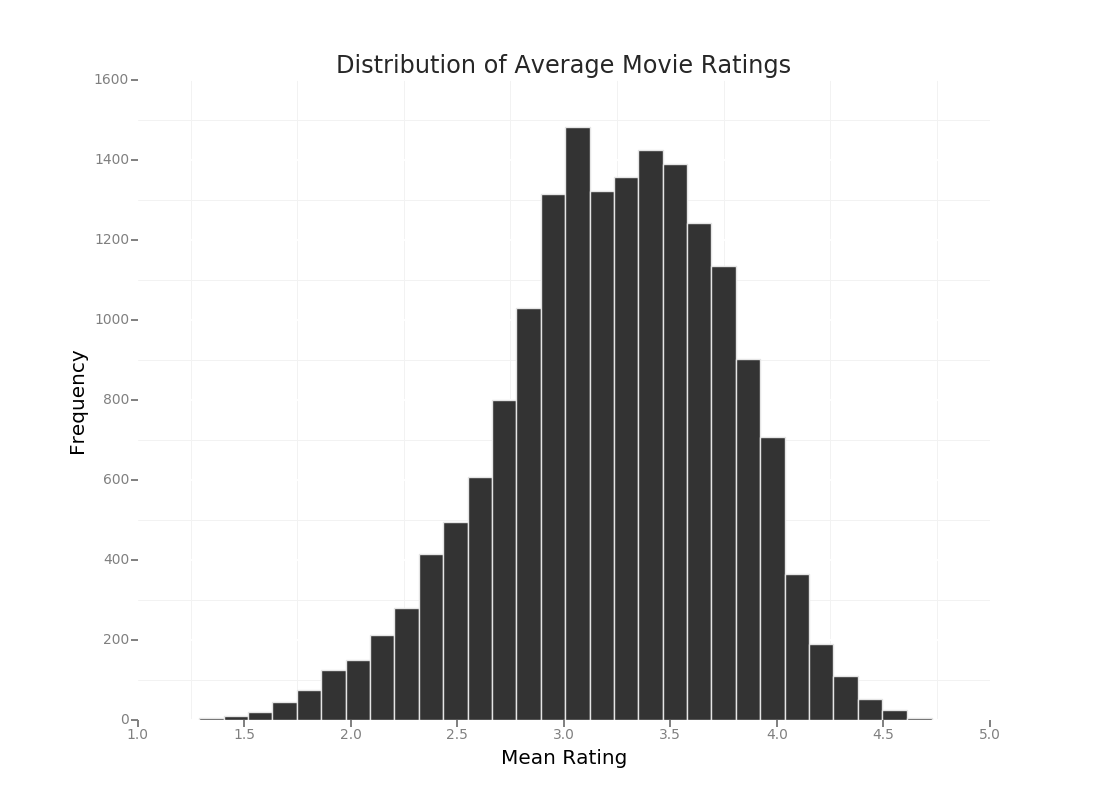

In [10]:
from ggplot import *
import seaborn as sns
m_ratings_plot = ggplot(movie_rating_stats.toPandas(), aes('Mean Rating')) + geom_bar() + ylab('Frequency') +ggtitle('Distribution of Average Movie Ratings') + xlim(1,5)
display(m_ratings_plot)

#### A few movies' ratings distributions: boxplots showing mean and inter-quartile range

In [12]:
movie_sample_size = 6/df_num_rows
sample_movies = list(df.sample(False, movie_sample_size, 4).toPandas()['MOVIE_TITLE'].unique())

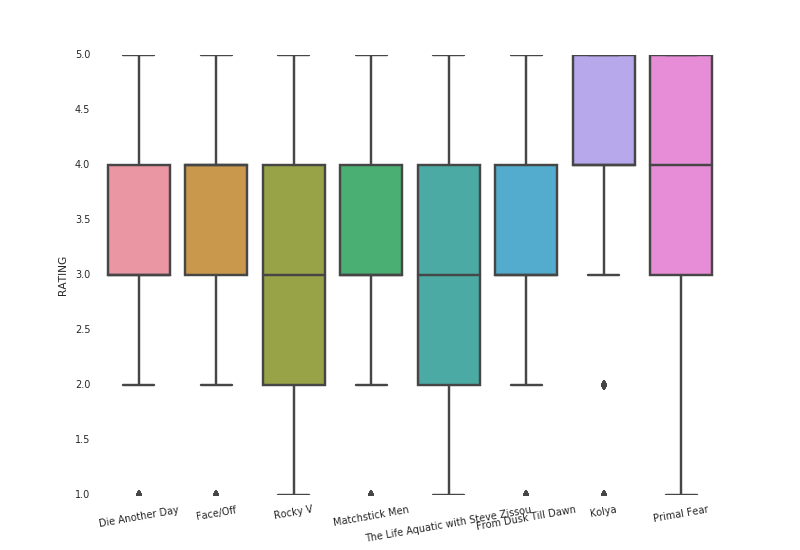

In [13]:
import seaborn as sns
sns.set(font_scale = 0.7)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = sns.boxplot(x="MOVIE_TITLE", y="RATING", data = df.filter(df.MOVIE_TITLE.isin(sample_movies)).withColumn("RATING",df["RATING"].cast(FloatType())).toPandas())
ax.set(xlabel = '')
plt.xticks(rotation=10)
display(fig)

##### Movie ratings by year of creation

In [15]:
yearly_ratings = df.groupby('YEAR').mean().select(['YEAR', 'avg(RATING)']).withColumnRenamed('avg(RATING)', 'Mean Rating')

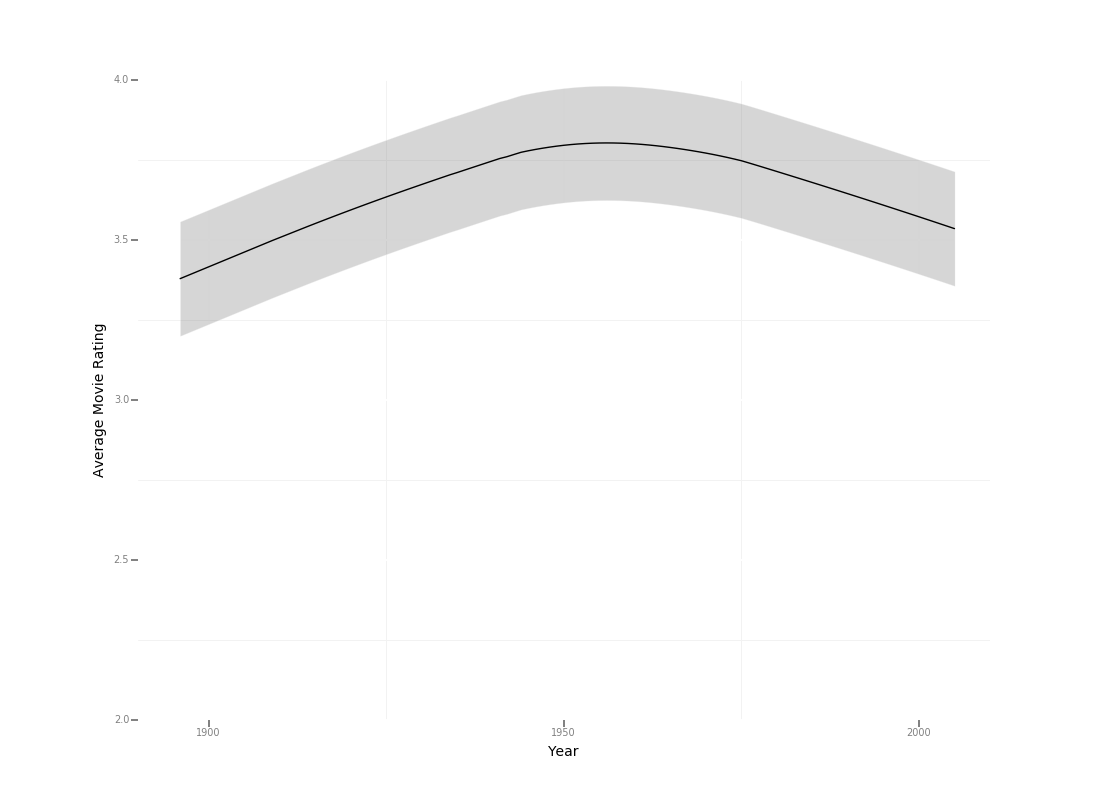

In [16]:
m_ratings_dist = ggplot(yearly_ratings.withColumn("Mean Rating",yearly_ratings["Mean Rating"].cast(FloatType())).toPandas(), aes(x = 'YEAR', y = 'Mean Rating')) + geom_smooth(level = 0.9) + xlim(1890, 2010) + ylim(2,4) + xlab('Year') + ylab('Average Movie Rating')
display(m_ratings_dist)

In [17]:
import pandas as pd
user_sample_size = 4/df_num_rows
sample_users = list(df.sample(False, user_sample_size, 4).select('USER_ID').toPandas()['USER_ID'].unique())

##### User Ratings

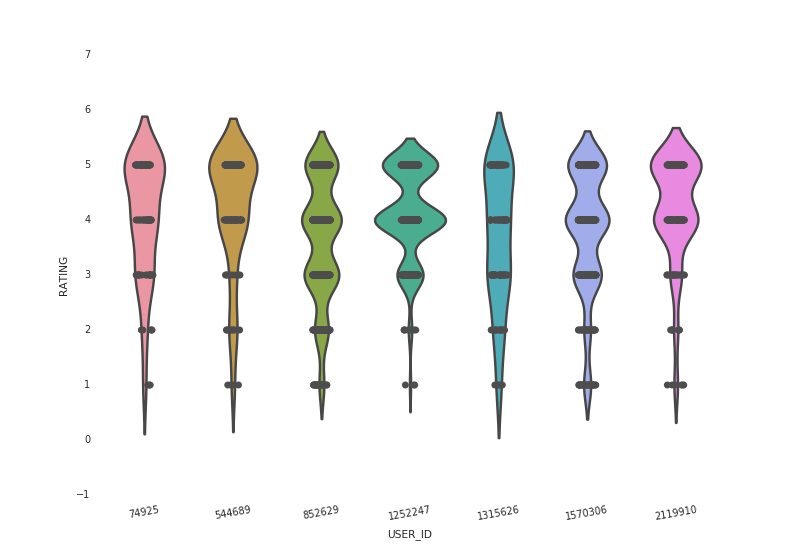

In [19]:
fig, ax = plt.subplots()
ax = sns.violinplot(x="USER_ID", y="RATING", data = df.filter(df.USER_ID.isin(sample_users)).withColumn("RATING",df["RATING"].cast(FloatType())).toPandas(), inner = None)
ax = sns.stripplot(x="USER_ID", y="RATING", data = df.filter(df.USER_ID.isin(sample_users)).withColumn("RATING",df["RATING"].cast(FloatType())).toPandas(), jitter = True, color = ".3")
plt.xticks(rotation=10)
display(fig)

### The model 
We build a model which recommends three movies to users based on the users' historical ratings.

In [21]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row
als = ALS(maxIter=20, regParam=0.1, userCol = 'USER_ID', itemCol='MOVIE_ID', ratingCol='RATING', coldStartStrategy = "drop")
model = als.fit(df)
#Create recommendations from the model
recommendations = model.recommendForAllUsers(3)

##### Reshape the recommendation data (output from algorithm) into something to export back to Snowflake

In [23]:
flat_recs = recommendations.select("USER_ID", recommendations.recommendations[0]['MOVIE_ID'].alias('REC1_MOVIE_ID'), recommendations.recommendations[1]['MOVIE_ID'].alias('REC2_MOVIE_ID'), recommendations.recommendations[2]['MOVIE_ID'].alias('REC3_MOVIE_ID'))
final_recs = flat_recs.join(movie_titles, (movie_titles.MOVIE_ID == flat_recs.REC1_MOVIE_ID), how = 'inner').drop('MOVIE_ID').withColumnRenamed('MOVIE_TITLE', 'REC1_MOVIE_TITLE').join(movie_titles, (movie_titles.MOVIE_ID == flat_recs.REC2_MOVIE_ID)).drop('MOVIE_ID').withColumnRenamed('MOVIE_TITLE', 'REC2_MOVIE_TITLE').join(movie_titles, (movie_titles.MOVIE_ID == flat_recs.REC3_MOVIE_ID)).drop('MOVIE_ID').withColumnRenamed('MOVIE_TITLE', 'REC3_MOVIE_TITLE')

#### The recommendations

In [25]:
display(final_recs.orderBy('USER_ID'))

USER_ID,REC1_MOVIE_ID,REC2_MOVIE_ID,REC3_MOVIE_ID,REC1_MOVIE_TITLE,REC2_MOVIE_TITLE,REC3_MOVIE_TITLE
6,14961,7230,7057,Lord of the Rings: The Return of the King: Extended Edition,The Lord of the Rings: The Fellowship of the Ring: Extended Edition,Lord of the Rings: The Two Towers: Extended Edition
7,14550,14961,7230,The Shawshank Redemption: Special Edition,Lord of the Rings: The Return of the King: Extended Edition,The Lord of the Rings: The Fellowship of the Ring: Extended Edition
8,2568,14961,8468,Stargate SG-1: Season 8,Lord of the Rings: The Return of the King: Extended Edition,CSI: Season 3
10,3456,14550,14961,Lost: Season 1,The Shawshank Redemption: Special Edition,Lord of the Rings: The Return of the King: Extended Edition
25,12398,8226,5092,Veronica Mars: Season 1,Buffy the Vampire Slayer: Season 5,Buffy the Vampire Slayer: Season 2
33,14550,3456,14961,The Shawshank Redemption: Special Edition,Lost: Season 1,Lord of the Rings: The Return of the King: Extended Edition
42,15104,13504,14961,Anne of Green Gables: The Sequel,House,Lord of the Rings: The Return of the King: Extended Edition
59,17085,12891,17307,24: Season 2,24: Season 3,CSI: Season 4
79,15104,7751,7815,Anne of Green Gables: The Sequel,Anne of Green Gables,Gilmore Girls: Season 4
83,15104,7815,7751,Anne of Green Gables: The Sequel,Gilmore Girls: Season 4,Anne of Green Gables


#### Load to Snowflake as a new table in your database

In [27]:
final_recs.write.format("net.snowflake.spark.snowflake").options(**sfOptions).option('dbtable', 'NETFLIX_RECOMMENDATIONS').mode('overwrite').saveAsTable('NETFLIX_RECOMMENDATIONS')